<a href="https://colab.research.google.com/github/switin2006/Spam-Email-Detector/blob/main/Email_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix


In [3]:
#Data Loading
data='/content/drive/MyDrive/archive (2)/emails.csv'
df=pd.read_csv(data)
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


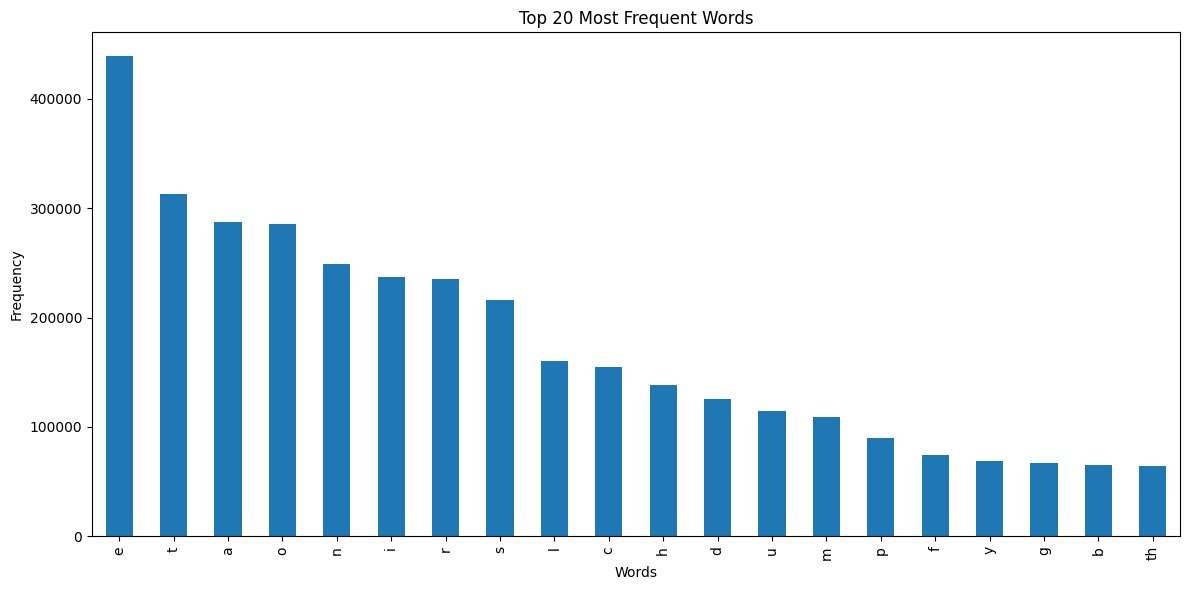

In [13]:
#Bar Plot of Top N Words
word_columns = df.drop(columns=["Email No.", "Prediction"])
word_sums = word_columns.sum().sort_values(ascending=False)
top_n = 20
word_sums.head(top_n).plot(kind='bar', figsize=(12,6), title=f'Top {top_n} Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [14]:
#Data-split for Training,Validation and Testing
train,temp=train_test_split(df,test_size=0.4,random_state=0)
test,valid=train_test_split(temp,test_size=0.5,random_state=0)

In [15]:
#Pre-processing of data i.e Scaling data to equal level
def Scaledataframe(dataframe,over_sampling=False):
  X=dataframe.drop(['Prediction','Email No.'],axis=1)
  y=dataframe['Prediction']
  if over_sampling:
    ros=RandomOverSampler(random_state=0)
    X,y=ros.fit_resample(X,y)
  scaler=StandardScaler()
  X=scaler.fit_transform(X)
  data_scaled=np.hstack((X,np.reshape(y.values,(-1,1))))
  return data_scaled,X,y


In [6]:
train,X_train,y_train=Scaledataframe(train,over_sampling=True)
test,X_test,y_test=Scaledataframe(test)
valid,X_valid,y_valid=Scaledataframe(valid)

#Logistic Regression


In [7]:
#Using Logistic Regression
model_logistic=LogisticRegression()
model_logistic.fit(X_train,y_train)
y_preds=model_logistic.predict(X_test)
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       1.00      0.88      0.93       720
           1       0.78      0.99      0.87       314

    accuracy                           0.91      1034
   macro avg       0.89      0.93      0.90      1034
weighted avg       0.93      0.91      0.91      1034



#KNN

In [8]:
#Using KNN
model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_preds=model_knn.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80       720
           1       0.56      0.97      0.71       314

    accuracy                           0.76      1034
   macro avg       0.77      0.82      0.75      1034
weighted avg       0.86      0.76      0.77      1034



#NaiveBayers

In [9]:
#Using Naive Bayers
model_Bayers=GaussianNB()
model_Bayers.fit(X_train,y_train)
y_preds=model_Bayers.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       720
           1       0.96      0.57      0.72       314

    accuracy                           0.86      1034
   macro avg       0.90      0.78      0.81      1034
weighted avg       0.88      0.86      0.85      1034



#SVM

In [10]:
#Using Support Vector Machine
model_svm=SVC()
model_svm.fit(X_train,y_train)
y_preds=model_svm.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       720
           1       0.76      0.88      0.82       314

    accuracy                           0.88      1034
   macro avg       0.85      0.88      0.86      1034
weighted avg       0.89      0.88      0.88      1034

